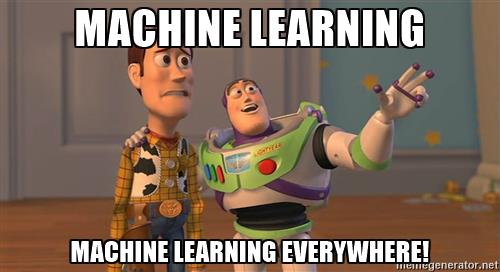

In [1]:
from IPython.display import Image
display(Image('https://raw.githubusercontent.com/anisayari/your_first_machine_learning_project/master/images/machine-learning-everywhere.jpg', width=500, unconfined=True))

Import Libaries 

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

D:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
#Read data

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
#combine the dataset
combine = [train, test]
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
test.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

#### categorical values identification

Survived, Sex, Embarked, ordinal pclass
continuous value: age, fare 
Discrete: SibSp, Parch.

#### Feature with mixed value

Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

#### Missing values in Train data set
Age,  Cabin,and Embarked has missing value                      



In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Jermyn, Miss. Annie",male,1601,B96 B98,S
freq,1,577,7,4,644


    Names are unique across the dataset (count=unique=891)
    Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
    Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
    Embarked takes three possible values. S port used by most passengers (top=S)
    Ticket feature has high ratio (22%) of duplicate values (unique=681).
    
    
#### Completing the data

    We may want to complete Age feature as it is definitely correlated to survival.
    We may want to complete the Embarked feature as it may also correlate with survival or another important feature.
    
#### Correcting.

    Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
    Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
    PassengerId may be dropped from training dataset as it does not contribute to survival.
    Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.  
    
    
#### Creating.

    We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
    We may want to engineer the Name feature to extract Title as a new feature.
    We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
    We may also want to create a Fare range feature if it helps our analysis.    
    
#### Classifying.

We may also add to our assumptions based on the problem description noted earlier.

    Women (Sex=female) were more likely to have survived.
    Children (Age<?) were more likely to have survived.
    The upper-class passengers (Pclass=1) were more likely to have survived.    
    
    

In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [13]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

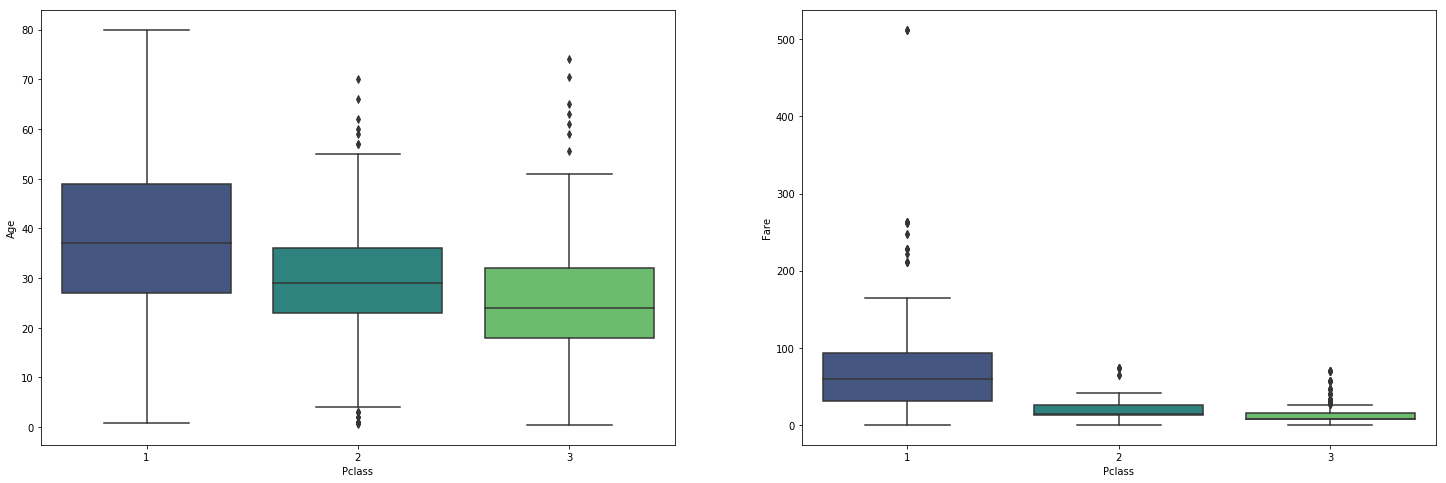

In [14]:
fig,axes = plt.subplots(1, 2,figsize=(25,8))
print(axes)

sns.boxplot(x='Pclass',y='Age',data=train, palette='viridis',ax=axes[0])

# We now need to check for outliers (values that seem irregular compared to the others)
sns.boxplot(x='Pclass',y='Fare',data=train, palette='viridis',ax=axes[1])

plt.show()

In [15]:
train.loc[train.Fare > 200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


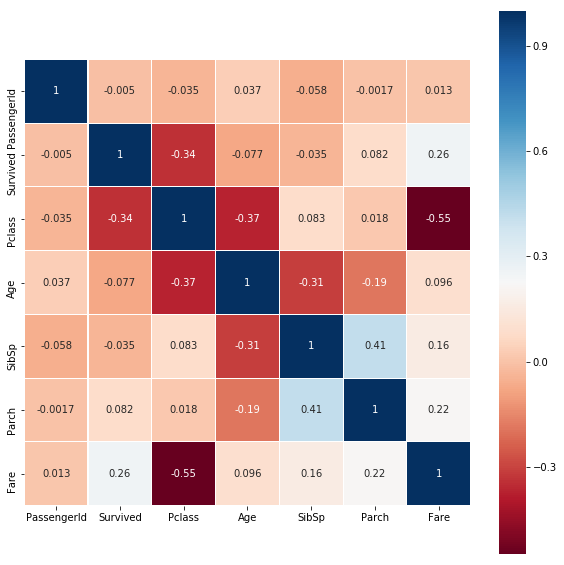

In [16]:
numerical_column = ['int64','float64'] #select only numerical features to find correlation
plt.figure(figsize=(10,10))
sns.heatmap(
    train.select_dtypes(include=numerical_column).corr(),
    cmap=plt.cm.RdBu,
    vmax=1.0,
    linewidths=0.1,
    linecolor='white',
    square=True,
    annot=True
)

In [17]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [18]:
# train.Sex.value_counts()
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# train['Sex'] = labelencoder.fit_transform(train['Sex'])
# train.Sex.value_counts()


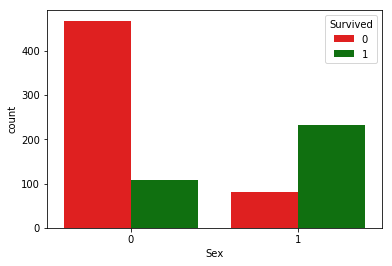

In [19]:
palette ={1:"g", 0:"r"}
sns.countplot(x='Sex',data=train,hue="Survived", palette=palette)

In [20]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp']+dataset['Parch']+1
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)    

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


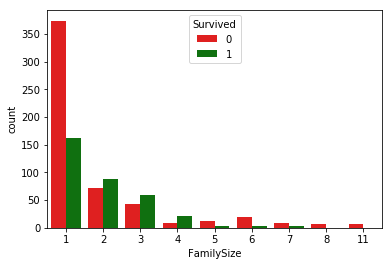

In [21]:
palette ={1:"g", 0:"r"}
sns.countplot(x='FamilySize',data=train,hue="Survived", palette=palette)

In [22]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()    

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


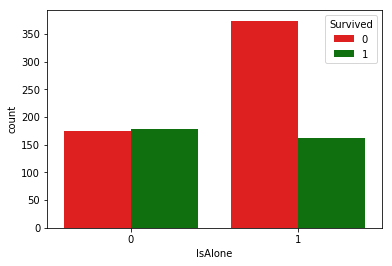

In [23]:
sns.countplot(x='IsAlone',data=train,hue="Survived", palette=palette)

In [24]:
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train, test]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,1


In [25]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [26]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,0,3.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,1,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,0,3.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,1,1.0


In [27]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,0.0,0.444444
1,1.0,0.156673
2,2.0,0.697802
3,3.0,0.792000
4,4.0,0.575000


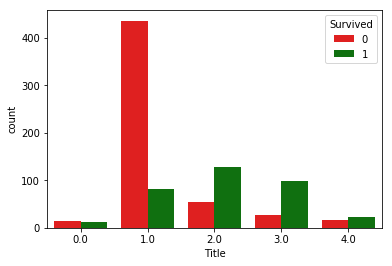

In [28]:
sns.countplot(x='Title',data=train,hue="Survived", palette=palette)

In [29]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [train, test]
train.shape, test.shape

((891, 10), (418, 10))

In [30]:
test.head()

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone,Title
0,892,3,0,34.5,330911,7.8292,NaN,Q,1,1.0
1,893,3,1,47.0,363272,7.0000,NaN,S,0,3.0
2,894,2,0,62.0,240276,9.6875,NaN,Q,1,1.0
3,895,3,0,27.0,315154,8.6625,NaN,S,1,1.0
4,896,3,1,22.0,3101298,12.2875,NaN,S,0,3.0


In [31]:
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone,Title
0,0,3,0,22.0,A/5 21171,7.2500,NaN,S,0,1.0
1,1,1,1,38.0,PC 17599,71.2833,C85,C,0,3.0
2,1,3,1,26.0,STON/O2. 3101282,7.9250,NaN,S,1,2.0
3,1,1,1,35.0,113803,53.1000,C123,S,0,3.0
4,0,3,0,35.0,373450,8.0500,NaN,S,1,1.0


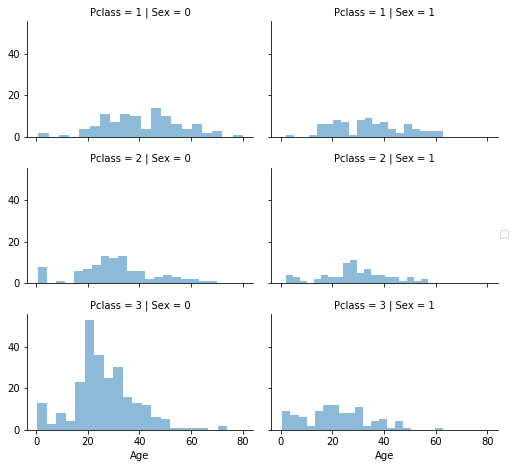

In [32]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [33]:
train.head(5)

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone,Title
0,0,3,0,22.0,A/5 21171,7.2500,NaN,S,0,1.0
1,1,1,1,38.0,PC 17599,71.2833,C85,C,0,3.0
2,1,3,1,26.0,STON/O2. 3101282,7.9250,NaN,S,1,2.0
3,1,1,1,35.0,113803,53.1000,C123,S,0,3.0
4,0,3,0,35.0,373450,8.0500,NaN,S,1,1.0


In [34]:
train["AgeBand"] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [35]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

In [36]:
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone,Title,AgeBand
0,0,3,0,1.0,A/5 21171,7.2500,NaN,S,0,1.0,"(16.336, 32.252]"
1,1,1,1,2.0,PC 17599,71.2833,C85,C,0,3.0,"(32.252, 48.168]"
2,1,3,1,1.0,STON/O2. 3101282,7.9250,NaN,S,1,2.0,"(16.336, 32.252]"
3,1,1,1,2.0,113803,53.1000,C123,S,0,3.0,"(32.252, 48.168]"
4,0,3,0,2.0,373450,8.0500,NaN,S,1,1.0,"(32.252, 48.168]"


In [37]:
train = train.drop(['AgeBand',"Ticket", "Cabin" ], axis=1)
test = test.drop(["Ticket", "Cabin" ], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,0,3,0,1.0,7.2500,S,0,1.0
1,1,1,1,2.0,71.2833,C,0,3.0
2,1,3,1,1.0,7.9250,S,1,2.0
3,1,1,1,2.0,53.1000,S,0,3.0
4,0,3,0,2.0,8.0500,S,1,1.0


In [38]:
freq_port = train.Embarked.dropna().mode()[0]
freq_port

'S'

In [39]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


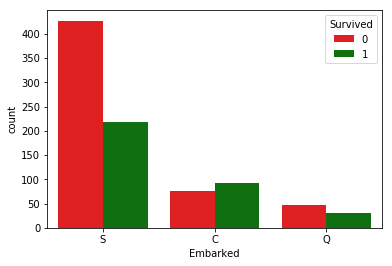

In [40]:
sns.countplot(x='Embarked',data=train,hue="Survived", palette=palette)

In [41]:
embarked = {'S': 0, 'C': 1, 'Q': 2} 
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map(embarked).astype(int)
  
    

In [42]:
train.head()  

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,0,3,0,1.0,7.2500,0,0,1.0
1,1,1,1,2.0,71.2833,1,0,3.0
2,1,3,1,1.0,7.9250,0,1,2.0
3,1,1,1,2.0,53.1000,0,0,3.0
4,0,3,0,2.0,8.0500,0,1,1.0


In [43]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)

In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            332 non-null float64
Fare           418 non-null float64
Embarked       418 non-null int32
IsAlone        418 non-null int64
Title          418 non-null float64
dtypes: float64(3), int32(2), int64(3)
memory usage: 22.9 KB


In [45]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [46]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)
combine = [train, test]
    


In [47]:
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,0,3,0,1.0,0,0,0,1.0
1,1,1,1,2.0,3,1,0,3.0
2,1,3,1,1.0,1,0,1,2.0
3,1,1,1,2.0,3,0,0,3.0
4,0,3,0,2.0,1,0,1,1.0
5,0,3,0,NaN,1,2,1,1.0
6,0,1,0,3.0,3,0,1,1.0
7,0,3,0,0.0,2,0,0,4.0
8,1,3,1,1.0,1,0,0,3.0
9,1,2,1,0.0,2,1,0,3.0


In [51]:
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,0,3,0,1.0,0,0,0,1.0
1,1,1,1,2.0,3,1,0,3.0
2,1,3,1,1.0,1,0,1,2.0
3,1,1,1,2.0,3,0,0,3.0
4,0,3,0,2.0,1,0,1,1.0
5,0,3,0,NaN,1,2,1,1.0
6,0,1,0,3.0,3,0,1,1.0
7,0,3,0,0.0,2,0,0,4.0
8,1,3,1,1.0,1,0,0,3.0
9,1,2,1,0.0,2,1,0,3.0


In [50]:
print(test.shape, train.shape)


(418, 8) (891, 8)


In [52]:

test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,892,3,0,2.0,0,2,1,1.0
1,893,3,1,2.0,0,0,0,3.0
2,894,2,0,3.0,1,2,1,1.0
3,895,3,0,1.0,1,0,1,1.0
4,896,3,1,1.0,1,0,0,3.0
